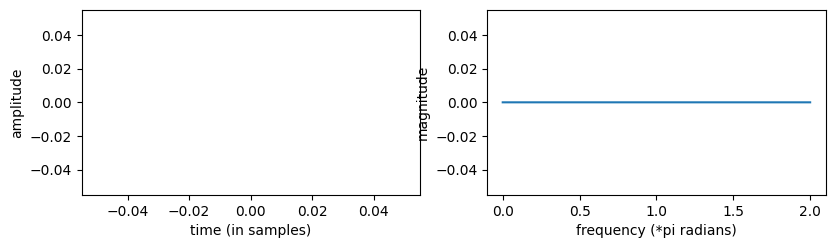

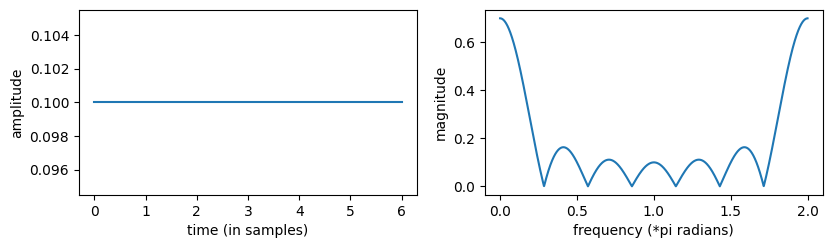

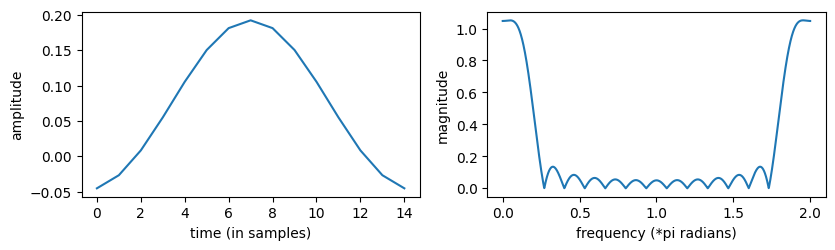

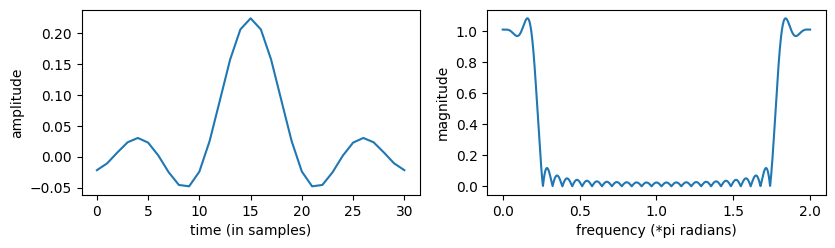

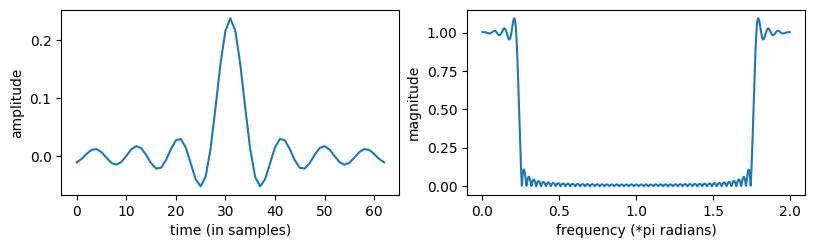

In [9]:
import numpy as np
from matplotlib import pyplot as plt

import librosa
FIG_SIZE = (8,3)

def getFIRFFT(H, order, winname=None) :
    NFFT = (len(H)-1)*2
    # Mirror Image of 'Real Value' & Initialize the imaginary value to 0
    H = np.concatenate((H, H[-2:0:-1])) + np.zeros(NFFT)*(1j)
    
    h = np.fft.ifft(H, NFFT)
    
    order = min(NFFT-1, order)
    h = np.concatenate((h[(len(h)-order//2):], h[0:order//2+1]))
    if winname != None:
        win = librosa.filters.get_window(winname, order+1, fftbins=False)
        h = h*win
    return h.real

def drawFIRFFT(h, NFFT=512):
    plt.subplot(1,2,1)
    plt.plot(h)
    plt.xlabel('time (in samples)')
    plt.ylabel('amplitude')
    plt.subplot(1,2,2)
    NFFT = max(len(h), NFFT)
    xticks=np.linspace(0, 2, num=NFFT, endpoint=True)
    plt.plot(xticks, np.abs(np.fft.fft(h, NFFT)))
    plt.xlabel('frequency (*pi radians)')
    plt.ylabel('magnitude')
    return h

for order in [2,6,14,30,62]:
    H = np.zeros(order, dtype=float)
    H[:order//2] = 1.0
    #H = [1.0]*(order//2) + [0.0]*(order//2)
    h = getFIRFFT(np.array(H), order)
    #plt.figure()
    plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
    drawFIRFFT(h, NFFT=2048)